In [1]:
# import python libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv(r"C:\Users\rohitzch\Desktop\RD\Learning\Python, VSC\VSC\P4 - EDA project (Amazon Diwali sales analysis)\Amazon Diwali Sales Data.csv", encoding= 'unicode_escape')
#to avoid encoding error, use "unicode_escape" 

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()  #to check for missing rows & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int64')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#For renaming column
#df.rename(columns= {'Marital_Status':'Shaadi'})

In [14]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()  # by this we can see values by max,min,count etc in our dataset

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

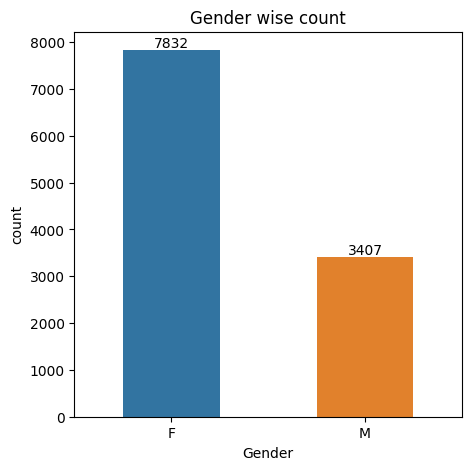

In [16]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'Gender',data = df, width=0.5,hue="Gender") #use hue in seaborn for getting different bar colors else all bars will be in blue color
#ax.set_title("Gender wise count") instaed of this I am using plt.title 
plt.title("Gender wise count")
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


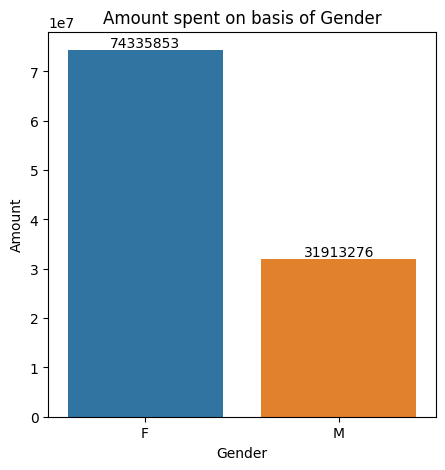

In [18]:
# plotting a bar chart for Total Amount spent on basis of Gender.

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(5,5))
ax=sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue="Gender")
plt.title("Amount spent on basis of Gender")
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f') #fmt='%.0f' used to get exact value above bars instead of scientific values.


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

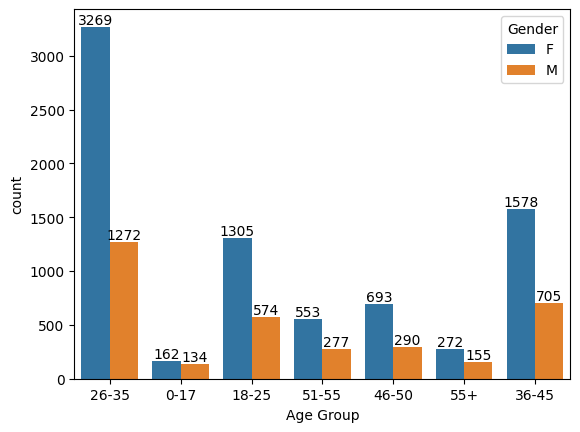

In [19]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

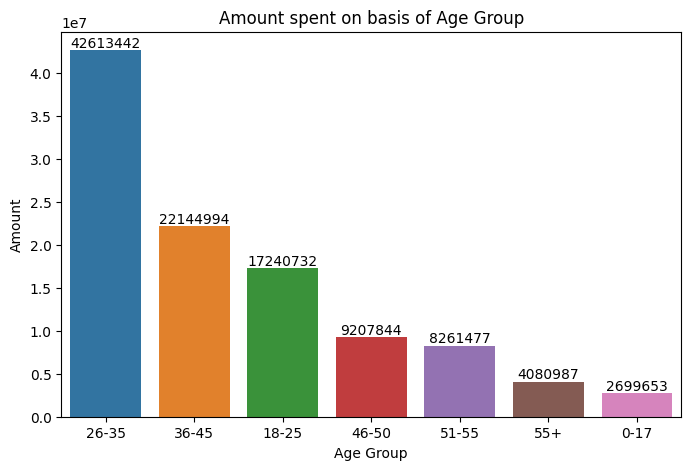

In [20]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(8,5))
a=sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, hue="Age Group")
plt.title("Amount spent on basis of Age Group")
for bars in a.containers:
    a.bar_label(bars,fmt='%.0f')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

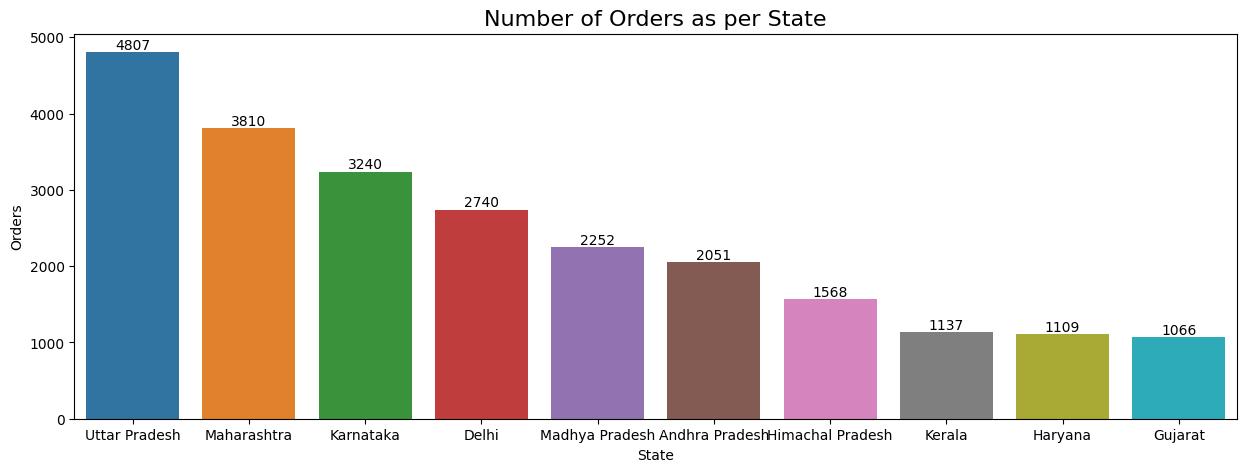

In [21]:
# total number of orders from top 10 states
plt.figure(figsize=(15,5))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.title("Number of Orders as per State",fontsize=16)
ax=sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue="State")
for bars in ax.containers:
    ax.bar_label(bars)

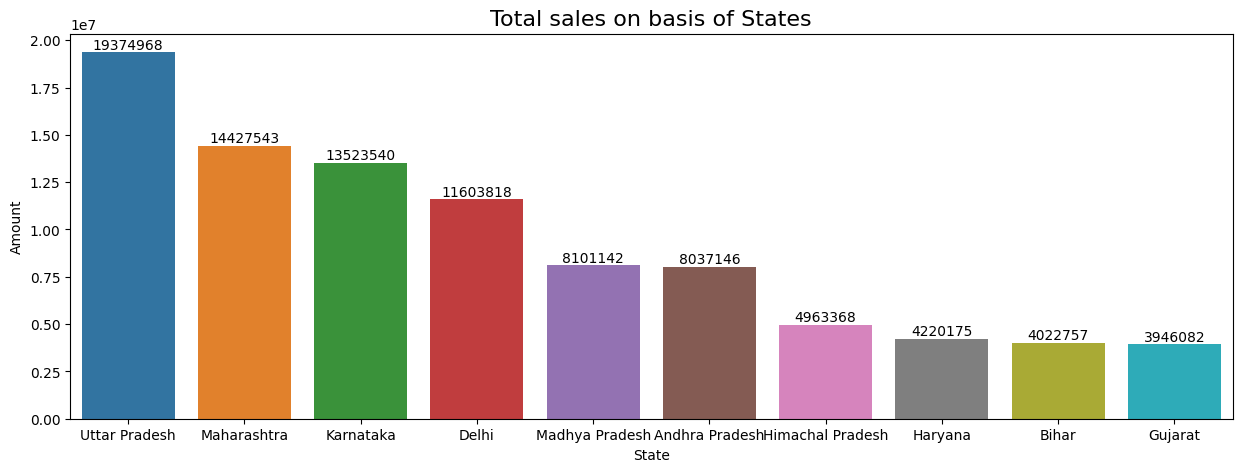

In [22]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(15,5))
plt.title("Total sales on basis of States",fontsize=16)
ax=sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue="State")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

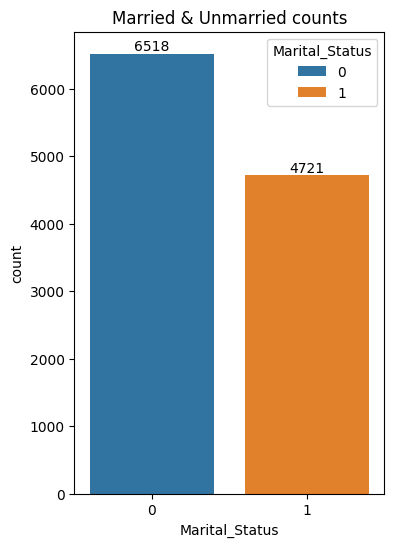

In [25]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data = df, x = 'Marital_Status',hue="Marital_Status")  # 0=Married , 1=Unmarried
plt.title("Married & Unmarried counts")
for bars in ax.containers:
    ax.bar_label(bars)

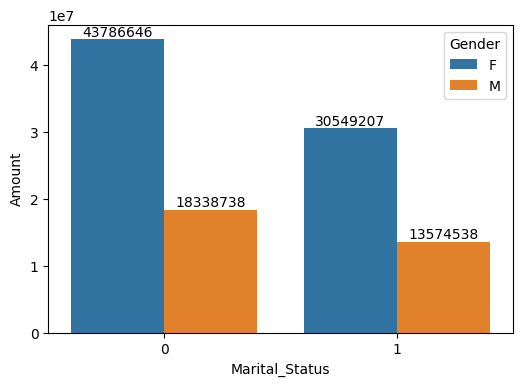

In [26]:
#Amount spent on basis of Marital statues & Gender.

data = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(6,4))
ax=sns.barplot(data = data, x = 'Marital_Status',y= 'Amount', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

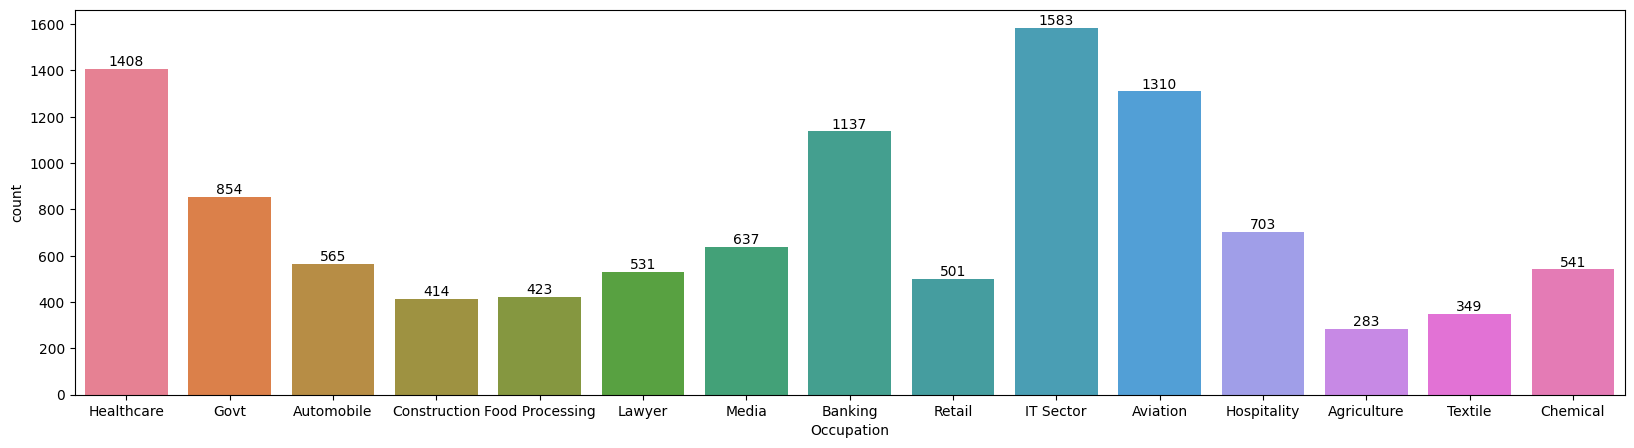

In [27]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Occupation',hue="Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

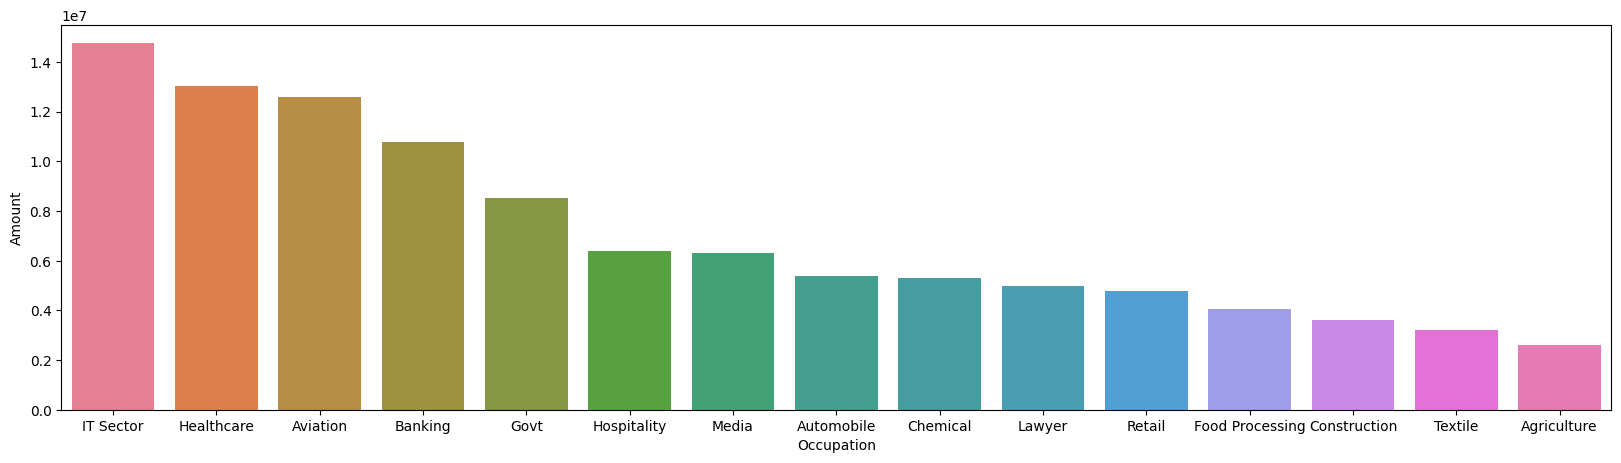

In [28]:
data = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data = data, x = 'Occupation',y= 'Amount',hue="Occupation")

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

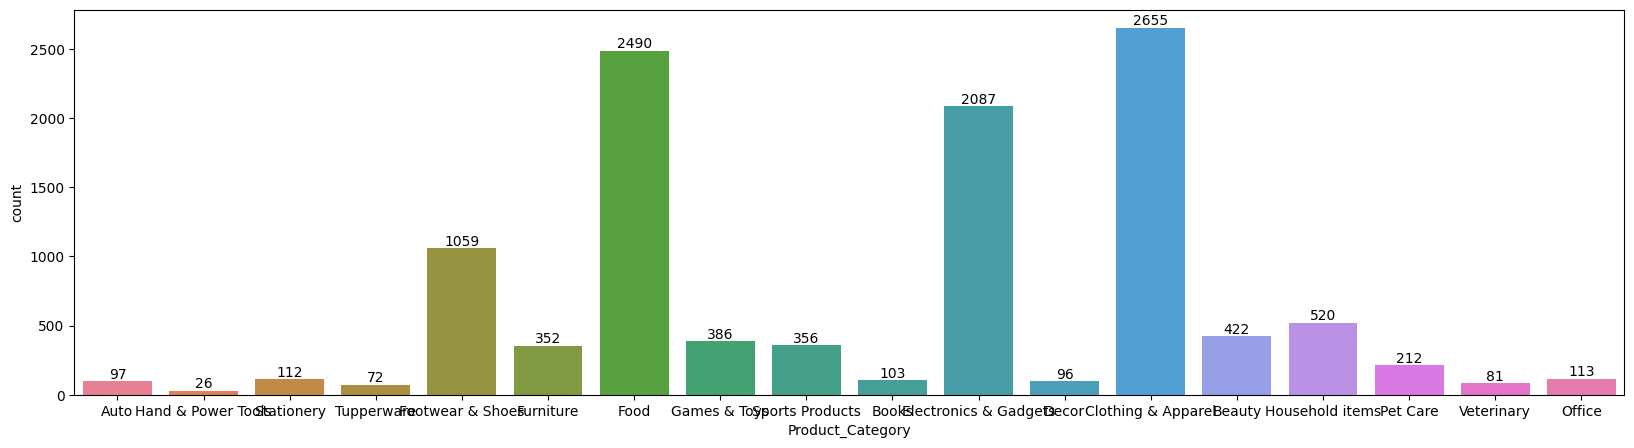

In [29]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Product_Category',hue="Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

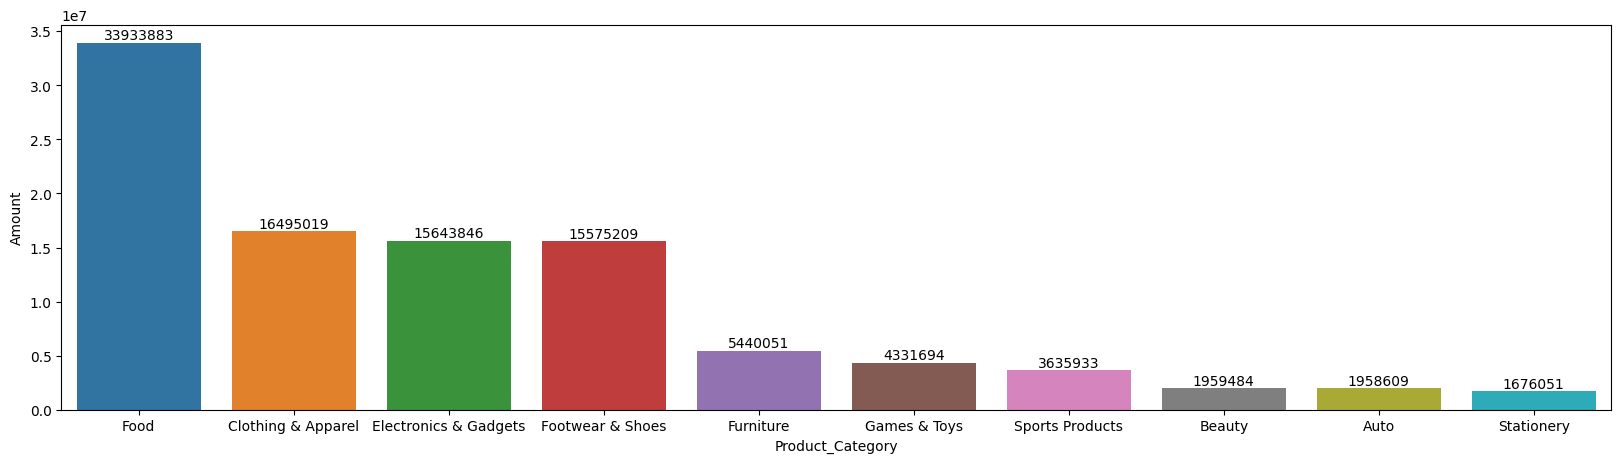

In [30]:
data = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))
ax=sns.barplot(data = data, x = 'Product_Category',y= 'Amount',hue="Product_Category")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

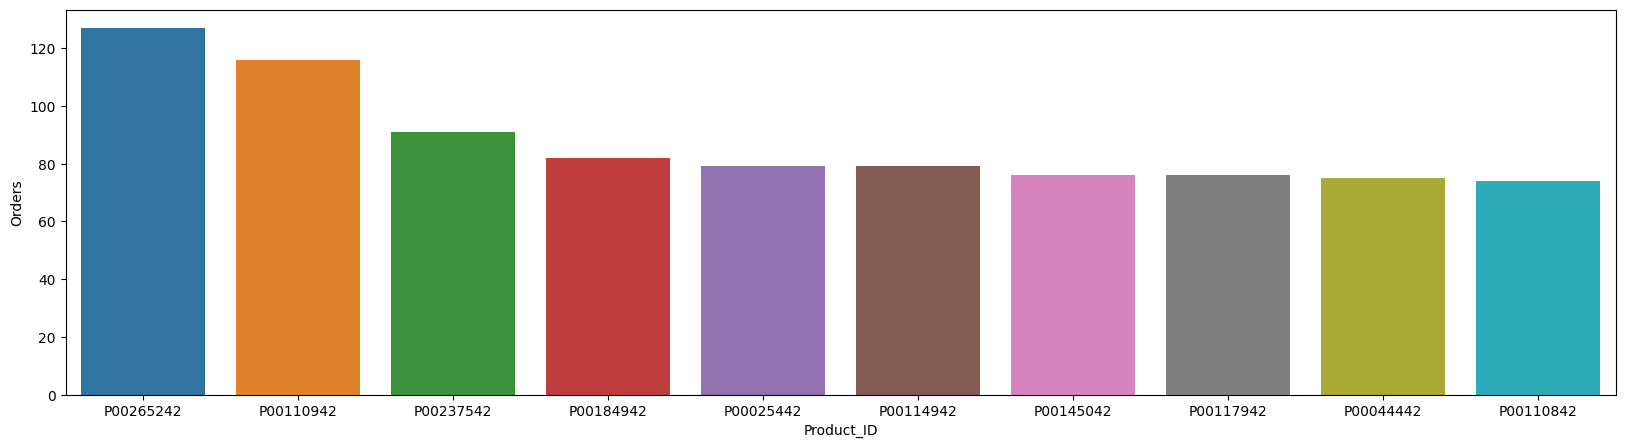

In [31]:
data = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = data, x = 'Product_ID',y= 'Orders',hue="Product_ID")

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*